In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df = pd.read_csv('weather.csv', parse_dates=True, index_col='Date')
# Temperature readings of the first 24 hours
df.Temperature[:24]

Date
2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
2010-01-01 05:00:00    43.0
2010-01-01 06:00:00    43.1
2010-01-01 07:00:00    42.3
2010-01-01 08:00:00    42.5
2010-01-01 09:00:00    45.9
2010-01-01 10:00:00    49.4
2010-01-01 11:00:00    52.4
2010-01-01 12:00:00    54.9
2010-01-01 13:00:00    57.1
2010-01-01 14:00:00    58.4
2010-01-01 15:00:00    59.1
2010-01-01 16:00:00    59.1
2010-01-01 17:00:00    58.0
2010-01-01 18:00:00    54.5
2010-01-01 19:00:00    51.3
2010-01-01 20:00:00    49.2
2010-01-01 21:00:00    48.1
2010-01-01 22:00:00    47.2
2010-01-01 23:00:00    46.4
Name: Temperature, dtype: float64

In [4]:
df['Lag_Temperature'] = df.Temperature.shift()
df['Temperature_Difference'] = df.Temperature.diff()
df.head()

,Temperature,DewPoint,Pressure,Lag_Temperature,Temperature_Difference
Date,,,,,
2010-01-01 00:00:00,46.2,37.5,1.0,NaN,NaN
2010-01-01 01:00:00,44.6,37.1,1.0,46.2,-1.6
2010-01-01 02:00:00,44.1,36.9,1.0,44.6,-0.5
2010-01-01 03:00:00,43.8,36.9,1.0,44.1,-0.3
2010-01-01 04:00:00,43.5,36.8,1.0,43.8,-0.3


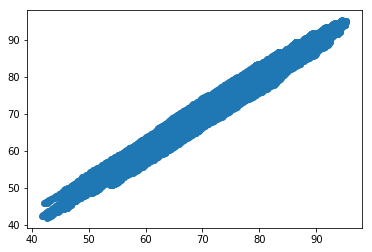

In [5]:
# Scatter plot of lagged temperature vs temperature
x = df['Lag_Temperature']
y = df['Temperature']
plt.scatter(x, y)

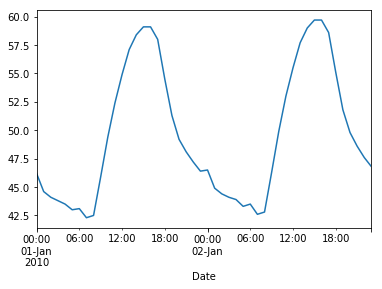

In [6]:
# Plot of the first 48 hours of temp
df.Temperature[:48].plot()

In [6]:
# Autocorrelation
df.Temperature.autocorr(lag=1)

0.990901872659764

In [7]:
# Autocorrelation at lag of 24
df.Temperature.autocorr(lag=24)

0.9997947452312897

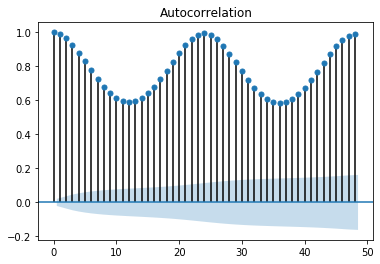

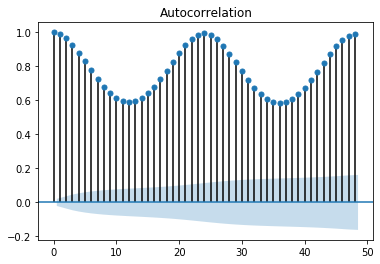

In [8]:
# plot_acf() measures autocorrelation at different lags
# Highest autocorrelation at lag of 24 hours
plot_acf(df.Temperature, lags=48)

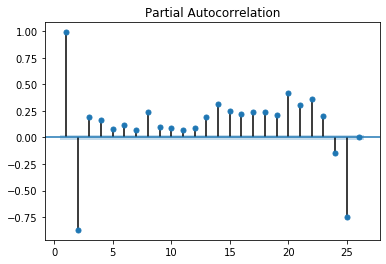

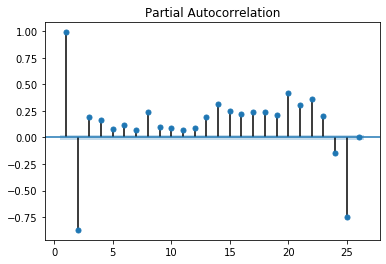

In [9]:
sm.graphics.tsaplots.plot_pacf(df.Temperature, lags=26, zero=False)